# COMP 472 - Assignment 1

## Import Librarys

In [1]:
import pandas as pd
import numpy as np
import sklearn as sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.neural_network import MLPClassifier

## Load The CSVs to DFs

In [2]:
penguindf = pd.read_csv('penguins.csv')
abalonedf = pd.read_csv('abalone.csv')
display(penguindf)
display(abalonedf)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214,4925,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215,4850,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222,5750,MALE
331,Gentoo,Biscoe,45.2,14.8,212,5200,FEMALE


,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,F,0.605,0.470,0.165,1.1775,0.6110,0.2275,0.2920,9
1,M,0.550,0.425,0.150,0.8315,0.4110,0.1765,0.2165,10
2,M,0.460,0.345,0.110,0.4595,0.2350,0.0885,0.1160,7
3,F,0.650,0.475,0.165,1.3875,0.5800,0.3485,0.3095,9
4,M,0.575,0.470,0.140,0.8375,0.3485,0.1735,0.2400,11
...,...,...,...,...,...,...,...,...,...
4172,F,0.570,0.450,0.150,0.9645,0.5310,0.1890,0.2090,9
4173,F,0.645,0.535,0.190,1.2395,0.4680,0.2385,0.4240,10
4174,M,0.695,0.550,0.195,1.6645,0.7270,0.3600,0.4450,11
4175,F,0.585,0.475,0.165,1.0530,0.4580,0.2170,0.3000,11


## 1 Hot Vector Penguins DF

In [3]:
penguin_columns_to_encode = ['island','sex']
penguindf_encoded = pd.get_dummies(penguindf, columns=penguin_columns_to_encode, drop_first=True, dtype='float')
display(penguindf_encoded)


,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,Adelie,39.1,18.7,181,3750,0.0,1.0,1.0
1,Adelie,39.5,17.4,186,3800,0.0,1.0,0.0
2,Adelie,40.3,18.0,195,3250,0.0,1.0,0.0
3,Adelie,36.7,19.3,193,3450,0.0,1.0,0.0
4,Adelie,39.3,20.6,190,3650,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214,4925,0.0,0.0,0.0
329,Gentoo,46.8,14.3,215,4850,0.0,0.0,0.0
330,Gentoo,50.4,15.7,222,5750,0.0,0.0,1.0
331,Gentoo,45.2,14.8,212,5200,0.0,0.0,0.0


## Plot Points on pie chart to check distribution


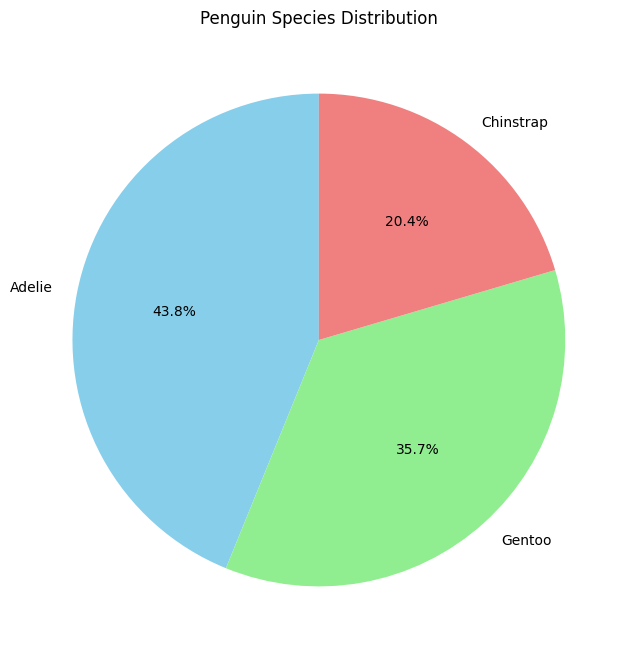

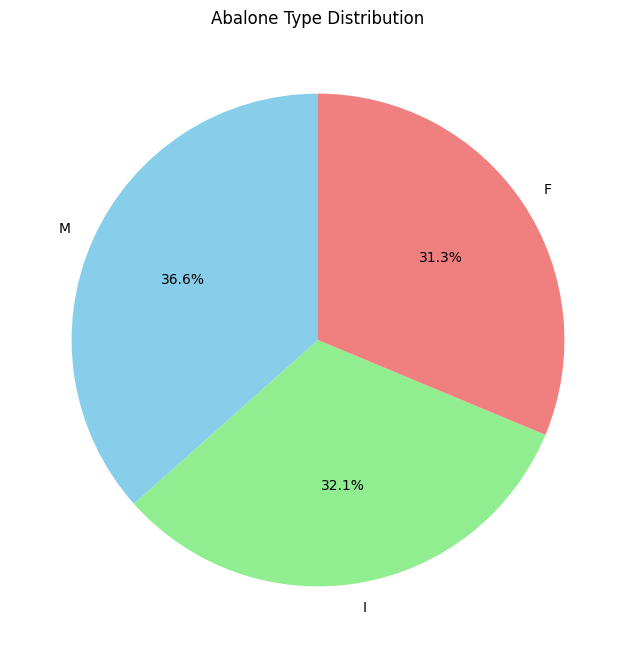

In [4]:
penguin_species_count = penguindf['species'].value_counts() # count the number of each species
abalone_type_count = abalonedf['Type'].value_counts() # count the number of each type


plt.figure(figsize=(8, 8))
plt.pie(penguin_species_count, labels=penguin_species_count.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Penguin Species Distribution')
plt.figure(figsize=(8, 8))
plt.pie(abalone_type_count, labels=abalone_type_count.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Abalone Type Distribution')
plt.show()

## Split data for training

In [5]:
X_penguin = penguindf_encoded.drop('species', axis=1)
y_penguin = penguindf_encoded['species']
penguin_training_set = sklearn.model_selection.train_test_split(X_penguin,y_penguin)
X_penguin_train, X_penguin_test, y_penguin_train, y_penguin_test = penguin_training_set

X_abalone = abalonedf.drop('Type', axis=1)
y_abalone = abalonedf['Type']
abalone_training_set = sklearn.model_selection.train_test_split(X_abalone,y_abalone)
X_abalone_train, X_abalone_test, y_abalone_train, y_abalone_test = abalone_training_set

## Base Decision Tree

Penguin F1 Score:  0.9523850531203473
Abalone Accuracy:  0.5033492822966508


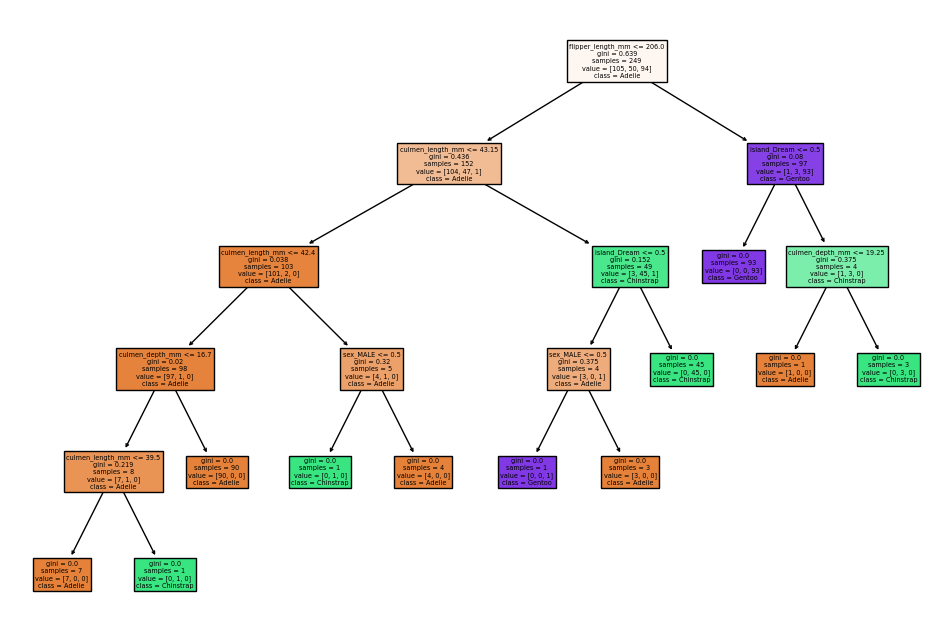

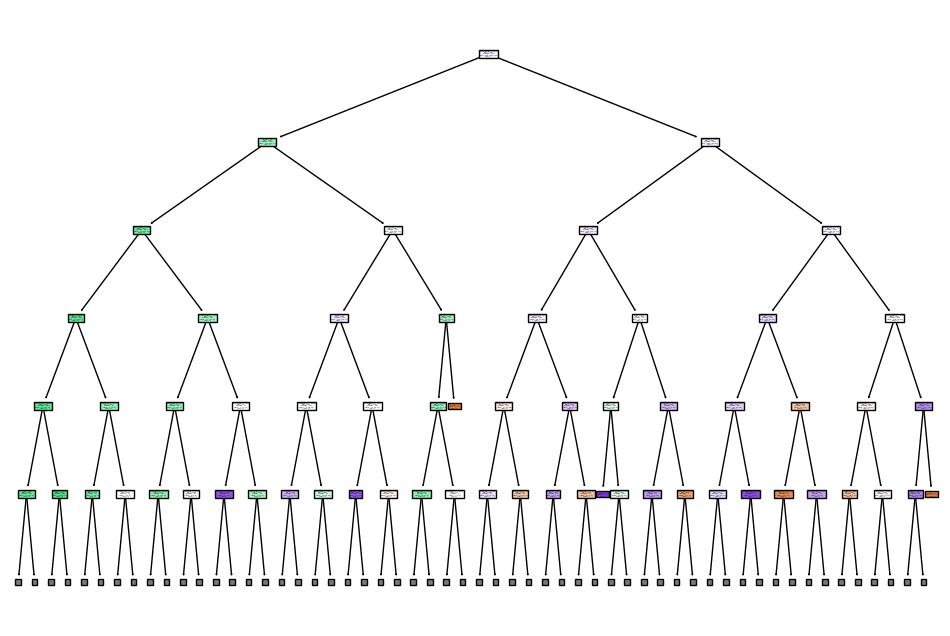

In [6]:
classifier_penguin = DecisionTreeClassifier()
classifier_penguin.fit(X_penguin_train, y_penguin_train)
y_penguin_pred = classifier_penguin.predict(X_penguin_test)
penguin_f1 = f1_score(y_penguin_test, y_penguin_pred, average='weighted')
print("Penguin F1 Score: ", penguin_f1)
plt.figure(figsize=(12, 8))
plot_tree(classifier_penguin, filled=True, feature_names=X_penguin.columns, class_names=y_penguin.unique())

classifier_abalone = DecisionTreeClassifier()
classifier_abalone.fit(X_abalone_train, y_abalone_train)
y_abalone_pred = classifier_abalone.predict(X_abalone_test)
abalone_accuracy = accuracy_score(y_abalone_test, y_abalone_pred)
print("Abalone Accuracy: ", abalone_accuracy)
plt.figure(figsize=(12, 8))
plot_tree(classifier_abalone, filled=True, feature_names=X_abalone.columns, class_names=y_abalone.unique(), max_depth=5)
plt.show()

## GridSearch

Best Parameters Penguin:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3}
Confusion Matrix Penguin:  [[38  2  1]
 [ 2 16  0]
 [ 0  0 25]]
Penguin F1 Score Weighted:  0.9402254729052114
Penguin F1 Score Macro:  0.9358508835633018
Penguin Accuracy:  0.9404761904761905
Penguin Precision:  0.9403388278388278
Penguin Recall:  0.9404761904761905


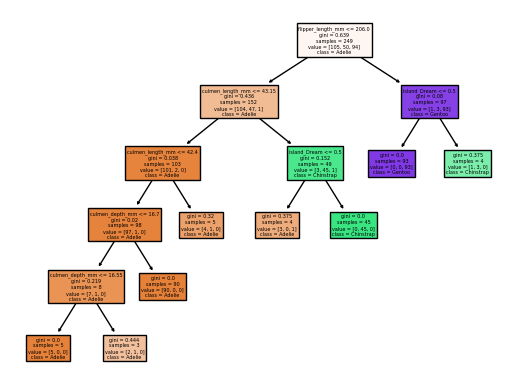

Best Parameters Abalone:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6}


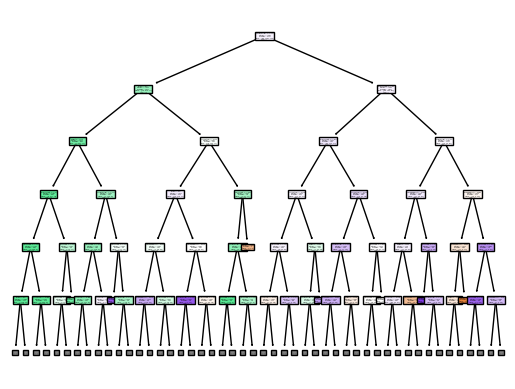

In [7]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2 , 6 , None],
    'min_samples_leaf': [ 4 , 3,  6 ]
}
grid_search_penguin = GridSearchCV(DecisionTreeClassifier(), param_grid)
grid_search_penguin.fit(X_penguin_train, y_penguin_train)
print("Best Parameters Penguin: ", grid_search_penguin.best_params_)
y_penguin_pred = grid_search_penguin.predict(X_penguin_test)
confusion_matrix_penguin = confusion_matrix(y_penguin_test, y_penguin_pred)
print("Confusion Matrix Penguin: ", confusion_matrix_penguin)
penguin_f1 = f1_score(y_penguin_test, y_penguin_pred, average='weighted')
print("Penguin F1 Score Weighted: ", penguin_f1)
penguin_f1 = f1_score(y_penguin_test, y_penguin_pred, average='macro')
print("Penguin F1 Score Macro: ", penguin_f1)
penguin_accuracy = accuracy_score(y_penguin_test, y_penguin_pred)
print("Penguin Accuracy: ", penguin_accuracy)
penguin_precision = precision_score(y_penguin_test, y_penguin_pred, average='weighted')
print("Penguin Precision: ", penguin_precision)
penguin_recall = recall_score(y_penguin_test, y_penguin_pred, average='weighted')
print("Penguin Recall: ", penguin_recall)

plot_tree(grid_search_penguin.best_estimator_, filled=True, feature_names=X_penguin.columns, class_names=y_penguin.unique())
plt.show()

grid_search_abalone = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='f1_weighted')
grid_search_abalone.fit(X_abalone_train, y_abalone_train)
print("Best Parameters Abalone: ", grid_search_abalone.best_params_)
plot_tree(grid_search_abalone.best_estimator_, filled=True, feature_names=X_abalone.columns, class_names=y_abalone.unique(), max_depth=5)
plt.show()

## Base-MLP

In [8]:
neural_network_penguin = MLPClassifier(hidden_layer_sizes=(100, 100), activation="logistic", solver="sgd")
neural_network_penguin.fit(X_penguin_train, y_penguin_train)
y_penguin_pred = neural_network_penguin.predict(X_penguin_test)
penguin_f1 = f1_score(y_penguin_test, y_penguin_pred, average='weighted')
print("Penguin F1 Score: ", penguin_f1)

neural_network_abalone = MLPClassifier(hidden_layer_sizes=(100, 100), activation="logistic", solver="sgd")
neural_network_abalone.fit(X_abalone_train, y_abalone_train)
y_abalone_pred = neural_network_abalone.predict(X_abalone_test)
abalone_accuracy = accuracy_score(y_abalone_test, y_abalone_pred)
print("Abalone Accuracy: ", abalone_accuracy)


Penguin F1 Score:  0.32019047619047614
Abalone Accuracy:  0.5263157894736842


c:\Users\Alan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Top-MLP

In [9]:
param_grid = {
    'activation': ['logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['sgd', 'adam']
}
grid_search_penguin = GridSearchCV(MLPClassifier(), param_grid)
grid_search_penguin.fit(X_penguin_train, y_penguin_train)
print("Best Parameters Penguin: ", grid_search_penguin.best_params_)

grid_search_abalone =  GridSearchCV(MLPClassifier(), param_grid)
grid_search_abalone.fit(X_abalone_train, y_abalone_train)
print("Best Parameters Abalone: ", grid_search_abalone.best_params_)

c:\Users\Alan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Parameters Penguin:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


c:\Users\Alan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Alan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Alan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Alan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

Best Parameters Abalone:  {'activation': 'tanh', 'hidden_layer_sizes': (10, 10, 10), 'solver': 'sgd'}
